In [1]:
# 패키지 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
sns.set()

In [2]:
# 데이터 로드
with open('factor.pkl', 'rb') as f:
    df = pickle.load(f)

In [3]:
# 시장국면 데이터
regime = df.iloc[:, :5]

# 팩터 데이터
factor = df.iloc[:, 5:]

In [4]:
# 시장국면 데이터 표준화
scaler = StandardScaler()
rescaled_regime = scaler.fit_transform(regime)
rescaled_regime_df = pd.DataFrame(rescaled_regime, index=regime.index, columns=regime.columns)

<Axes: xlabel='Date'>

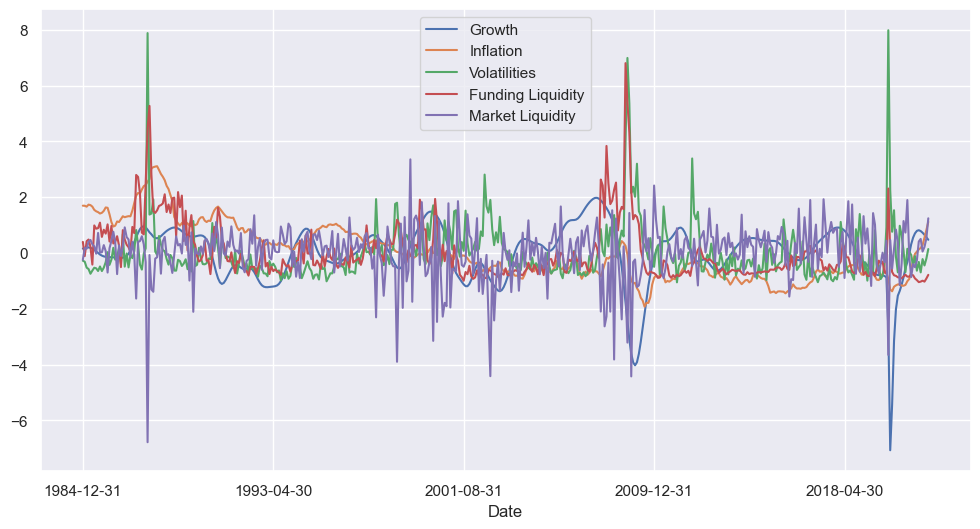

In [5]:
# 표준화 결과 시각화
rescaled_regime_df.plot(figsize=(12, 6))

In [6]:
# 국면 분석 기준 설정
# 하단 기준선
low_threshold = rescaled_regime_df.quantile(1/3)

# 상단 기준선
high_threshold = rescaled_regime_df.quantile(2/3)

In [7]:
# 낮은 국면
low_regime = (rescaled_regime_df < low_threshold) * 1

# 높은 국면
high_regime = (rescaled_regime_df > high_threshold) * 1

# 중간 국면
middle_regime = ((rescaled_regime_df >= low_threshold) & (rescaled_regime_df <= high_threshold)) * 1

In [8]:
low_regime

,Growth,Inflation,Volatilities,Funding Liquidity,Market Liquidity
Date,,,,,
1984-12-31,0,0,0,0,1
1985-01-31,0,0,0,0,0
1985-02-28,0,0,1,0,0
1985-03-31,0,0,1,0,0
1985-04-30,0,0,1,0,0
...,...,...,...,...,...
2021-08-31,0,0,1,1,0
2021-09-30,0,0,0,1,0
2021-10-31,0,0,0,1,0


<Axes: xlabel='Date'>

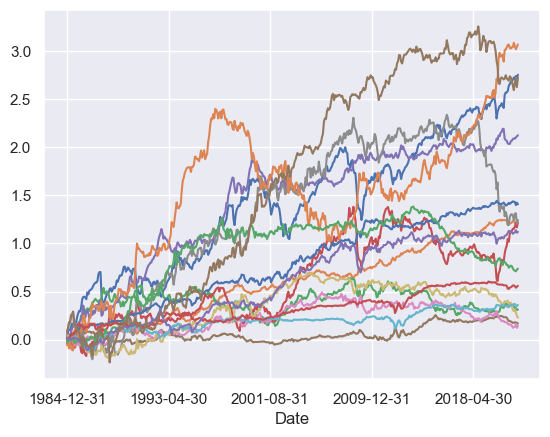

In [9]:
factor.cumsum().plot(legend=False)

In [10]:
# 빈 딕셔너리 생성
low_regime_dict = {}
middle_regime_dict = {}
high_regime_dict = {}

# 국면별 팩터 평균수익률 저장
for rgm in regime.columns:
    low_regime_dict[rgm] = (factor.multiply(low_regime[rgm], axis=0).sum() / np.count_nonzero(np.array(factor.multiply(low_regime[rgm], axis=0)))) * 252
    middle_regime_dict[rgm] = (factor.multiply(middle_regime[rgm], axis=0).sum() / np.count_nonzero(np.array(factor.multiply(middle_regime[rgm], axis=0)))) * 252
    high_regime_dict[rgm] = (factor.multiply(high_regime[rgm], axis=0).sum() / np.count_nonzero(np.array(factor.multiply(high_regime[rgm], axis=0)))) * 252

In [11]:
# 낮은 국면 데이터프레임
low_regime_df = pd.DataFrame(low_regime_dict)

# 중간 국면 데이터프레임
middle_regime_df = pd.DataFrame(middle_regime_dict)

# 높은 국면 데이터프레임
high_regime_df = pd.DataFrame(high_regime_dict)

In [12]:
# 전체 국면 분석 종합 딕셔너리
total_regime_dict = {}

for rgm in regime.columns:
    temp_df = pd.concat([low_regime_df[rgm], middle_regime_df[rgm], high_regime_df[rgm]], axis=1, join='inner')
    temp_df.columns = ['low', 'middle', 'high']
    total_regime_dict[rgm] = temp_df

<Axes: >

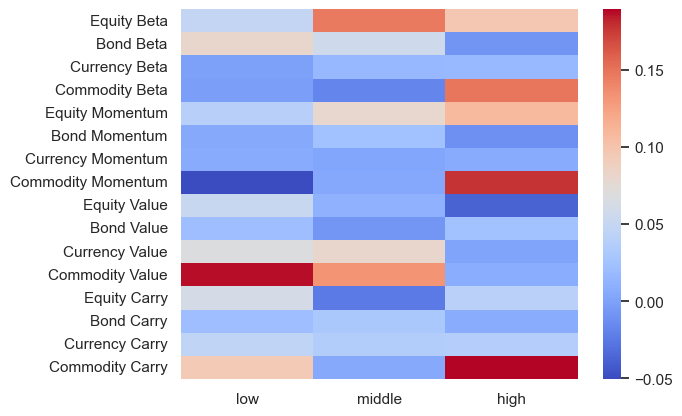

In [13]:
# 경제성장
sns.heatmap(total_regime_dict['Growth'], cmap='coolwarm')

<Axes: >

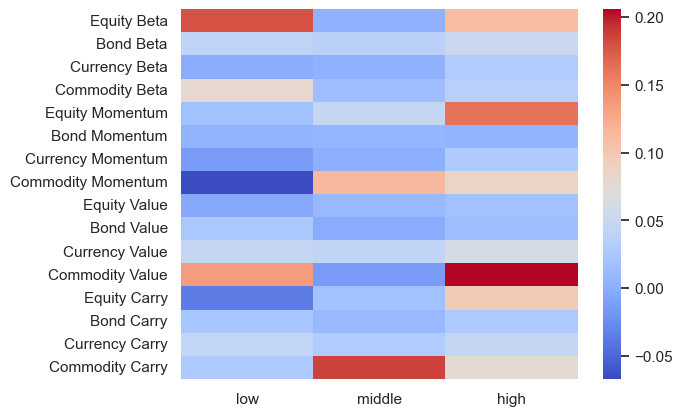

In [14]:
# 물가
sns.heatmap(total_regime_dict['Inflation'], cmap='coolwarm')

<Axes: >

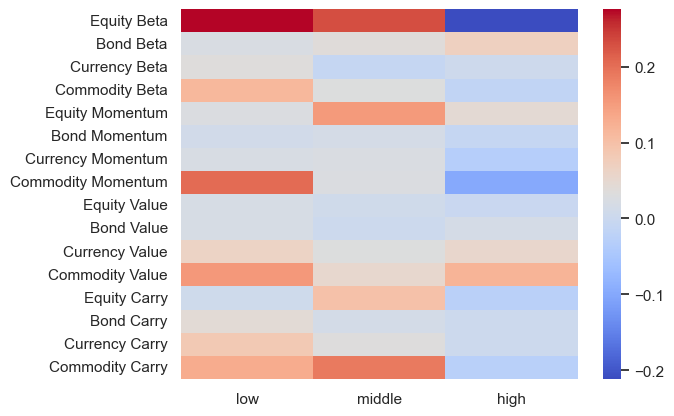

In [15]:
# 변동성
sns.heatmap(total_regime_dict['Volatilities'], cmap='coolwarm')

<Axes: >

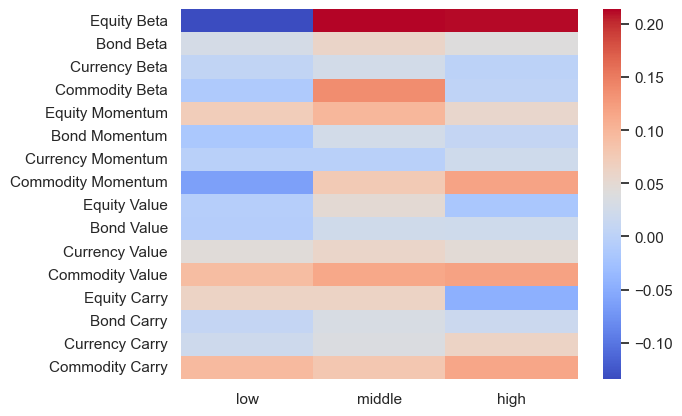

In [16]:
# 시장 유동성
sns.heatmap(total_regime_dict['Market Liquidity'], cmap='coolwarm')

<Axes: >

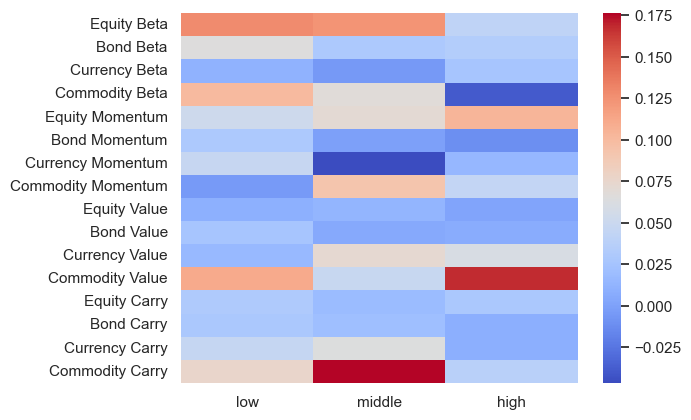

In [17]:
# 자금 유동성
sns.heatmap(total_regime_dict['Funding Liquidity'], cmap='coolwarm')